## Kaggle First Step

This is Kaggle for the first step.

[Kaggle](https://www.kaggle.com/) is a platform for predictive modelling and analytics competitions in which statisticians and data miners compete to produce the best models for predicting and describing the datasets uploaded by companies and users.   

I amg going to try Titanic: Machine Learning from Disaster.  
https://www.kaggle.com/c/titanic

Please download test.csv and train.csv.

Let's try it.


### Import

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Read CSV

In [12]:
df = pd.read_csv("train.csv")

In [13]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It change from str to num. Because it can't use str the analysis.

In [14]:
df.Embarked = df.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
df.Sex = df.Sex.replace(['male', 'female'], [0, 1])
df.Age = df.Age.replace('NaN', 0)

It delete the column.

In [15]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [16]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


I calculate a correlation coefficient.

In [17]:
corrmat = df.corr()

In [18]:
corrmat

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.126753
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.307324
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.023175
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.042340
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.031095
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.035756
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.269588
Embarked,-0.126753,0.307324,-0.023175,-0.042340,0.031095,-0.035756,-0.269588,1.000000


This is a heatmap of correlation coefficient.

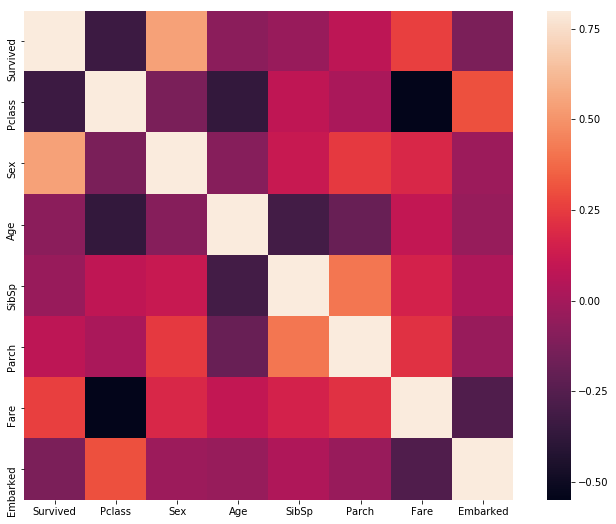

In [19]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

### Training

In [21]:
train_labels = df['Survived'].values
train_features = df
train_features.drop('Survived', axis=1, inplace=True)
train_features = train_features.values.astype(np.int64)

In [23]:
from sklearn import svm
svm = svm.LinearSVC()
svm.fit(train_features, train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Test

In [24]:
df_test = pd.read_csv("test.csv")

In [26]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [28]:
df_test.Embarked = df_test.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
df_test.Sex = df_test.Sex.replace(['male', 'female'], [0, 1])
df_test.Age = df_test.Age.replace('NaN', 0)

In [29]:
df_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1


It change to array type.

In [30]:
test_features = df_test.values.astype(np.int64)

In [32]:
y_test_pred = svm.predict(test_features)

### Final

In [34]:
df_out = pd.read_csv("test.csv")

In [35]:
df_out["Survived"] = y_test_pred

### Output

In [36]:
df_out[["PassengerId","Survived"]].to_csv("submission.csv",index=False)

In [38]:
output = pd.read_csv("submission.csv")

In [39]:
output.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Finally you can submit this output csv.  
https://www.kaggle.com/c/titanic/submit

### Let's try next competitions!!